# The Long Way That Demonstrates My Thinking and Work

## Import Necessary Libraries and Load Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Specify the path to the file
file_path = '/content/drive/My Drive/loan_data_2007_2014.csv'

# Read the CSV file into a DataFrame
loan_data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-204-cf0f8495fafe>:7: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv(file_path)


In [ ]:
# Display the first few rows of the DataFrame
display(loan_data.head())

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Target Variable Unique Values.  Further investigation should be done into the "does not meet the credit policy" values
loan_data['loan_status'].unique()

# The "does not meet the credit policy" versions should be merged

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

## Drop Fully Null Columns

In [ ]:
## 17 fully null columns
print((loan_data.notnull().sum() == 0).sum() , "\n")

for col in loan_data:
  if loan_data[col].notnull().sum() == 0:
    print(col)

## These should be dropped

17 

annual_inc_joint
dti_joint
verification_status_joint
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
inq_fi
total_cu_tl
inq_last_12m


## Drop Unusable Data Columns, With Explanations As To Why

In [ ]:
loan_data.info()

# Other columns of note to be dropped:
# "Unnamed: 0":         Artifact from reading the CSV
# "id":                 Loan Club unique identifier for each loan
# "member_id":          The theoretical manifestation of this in our data would be that some users would be targetted by the algorithm, not what we want
# "url":                Link to the loan listing
# "desc":               A string description of the loan.  Parsing this string to understand it is outside of the scope of this project
# "emp_title":          Contains strings of **places** where people are employed for the most part.  Nulls mean "unemployed".  Consider dropping for improved reliability
# "recoveries":         This column is only knowable *AFTER* someone has defaulted, so we can't use it to predict whether someone will default
# "collection_recovery_fee":      Same as "recoveries"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
loan_cleanup = loan_data.dropna(axis = 'columns', how = 'all')
loan_cleanup = loan_cleanup.drop(columns = ["Unnamed: 0", "id", "member_id", "url", "desc", "emp_title","recoveries" ,"collection_recovery_fee"])
loan_cleanup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  issue_d                      466285 non-null  object 
 13 

## Drop Single-Valued Columns and Columns Which Would Require More Work Than is in Scope

In [ ]:
for col in loan_cleanup.columns:
  if loan_cleanup[col].dtype == object:
    print(col,loan_cleanup[col].unique(), "\n")
    ##print(col,loan_cleanup[col].value_counts(), "\n")

term [' 36 months' ' 60 months'] 

grade ['B' 'C' 'A' 'E' 'F' 'D' 'G'] 

sub_grade ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5'] 

emp_length ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan] 

home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY'] 

verification_status ['Verified' 'Source Verified' 'Not Verified'] 

issue_d ['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 'Nov-07' 'Oct-07

In [ ]:
## There are oddities around the following values.  The should be dropped.

# "title":             These are user-provided titles to help them keep track of why the loan was taken out. Text meaning parsing is not within the scope of this project.
# "application_type":  All the same value, provides no help to our data

loan_cleanup = loan_cleanup.drop(columns = ["title", "application_type"])
loan_cleanup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  issue_d                      466285 non-null  object 
 13 

In [ ]:
for col in loan_cleanup.columns:
  if not loan_cleanup[col].dtype == object:
    print(col,loan_cleanup[col].unique(), "\n")
    ##print(col,loan_cleanup[col].value_counts(), "\n")

loan_amnt [ 5000  2500  2400 ... 33675 27775 33175] 

funded_amnt [ 5000  2500  2400 ... 27775 33175 31725] 

funded_amnt_inv [ 4975.  2500.  2400. ... 30425. 33125. 33625.] 

int_rate [10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 13.84 16.59
 17.19 12.87 20.69  9.67 21.82 19.79 18.49 22.94 24.59 24.4  21.48 14.82
 14.17  7.29 17.88 20.11 16.02 17.51 13.43 14.91 13.06 15.28 15.65 17.14
 11.11 10.37 16.4   7.66 10.   18.62 10.74  5.79  6.92  9.63 14.54 12.68
 19.36 13.8  18.99 21.59 20.85 21.22 19.74 20.48  6.91 12.23 12.61 10.36
  6.17  6.54  

In [ ]:
## There are oddities around the following value.  It should be dropped.

# policy_code:      Our source calls 1s "publicly available".  All values are 1, so will provide no help to our models


loan_cleanup = loan_cleanup.drop(columns = ["policy_code"])
loan_cleanup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  issue_d                      466285 non-null  object 
 13 

In [ ]:
loan_cleanup.loc[loan_cleanup['loan_status'] == "Does not meet the credit policy. Status:Fully Paid"].info()
#loan_cleanup.loc[loan_cleanup['loan_status'] == "Does not meet the credit policy. Status:Charged Off"].info()
#loan_cleanup.loc[loan_cleanup['loan_status'] == "Fully Paid"].info()
#loan_cleanup.loc[loan_cleanup['loan_status'] == "Charged Off"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 39786 to 42534
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    1988 non-null   int64  
 1   funded_amnt                  1988 non-null   int64  
 2   funded_amnt_inv              1988 non-null   float64
 3   term                         1988 non-null   object 
 4   int_rate                     1988 non-null   float64
 5   installment                  1988 non-null   float64
 6   grade                        1988 non-null   object 
 7   sub_grade                    1988 non-null   object 
 8   emp_length                   1969 non-null   object 
 9   home_ownership               1988 non-null   object 
 10  annual_inc                   1984 non-null   float64
 11  verification_status          1988 non-null   object 
 12  issue_d                      1988 non-null   object 
 13  loan_status  

In [ ]:
## There is no obvious distinguishing markers for what "Does not meet the credit policy" means.
## I found a source that describes these: https://www.uxax.org/post/data-cleaning-and-preparation-for-machine-learning
## "While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
## "While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."

## We are not trying to predict what will be approved, so this data is irrelevant to us.  Instead, we just care about whether or not the debt was paid off. A debt that "shouldn't" have been accepted, but
## instead was, and was fully paid off is the exact sort of thing that our project wants to be able to predict in the future.

## In the end, these statuses should just be renamed to their simpler versions.





## Replaces values with their simpler versions
loan_cleanup['loan_status'] = np.where((loan_cleanup['loan_status'] == "Does not meet the credit policy. Status:Fully Paid"), "Fully Paid", loan_cleanup['loan_status'])
loan_cleanup['loan_status'] = np.where((loan_cleanup['loan_status'] == "Does not meet the credit policy. Status:Charged Off"), "Charged Off", loan_cleanup['loan_status'])

## Explore the Nulls in the Remaining Columns to See Reasonable Replacement Values

In [ ]:
## Show us where our Remaining Nulls are
for col in loan_cleanup.columns:
  if (val:= loan_cleanup[col].isnull().sum()) != 0:
    print(col.ljust(35), val)

emp_length                          21008
annual_inc                          4
delinq_2yrs                         29
earliest_cr_line                    29
inq_last_6mths                      29
mths_since_last_delinq              250351
mths_since_last_record              403647
open_acc                            29
pub_rec                             29
revol_util                          340
total_acc                           29
last_pymnt_d                        376
next_pymnt_d                        227214
last_credit_pull_d                  42
collections_12_mths_ex_med          145
mths_since_last_major_derog         367311
acc_now_delinq                      29
tot_coll_amt                        70276
tot_cur_bal                         70276
total_rev_hi_lim                    70276


From here, we have a choice about how to handle the nulls.
- **emp_length**: Null seems to indicate that someone is not employed (i.e. retired) or newly employed.  However, there are 186 instances of people with actual job titles and null values for this.  Judging by proportions (186/21008 = .00885), I think **overwriting with <1 year is fine**.
- **annual_inc**: All 4 individuals seem to not meet the credit policy AND have fully paid their loan back.  It seems as if **replacing with 0 is fine**.
- **delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, total_acc, acc_now_delinq**: All 29 individuals did not meet the credit policy, with a mixture of some managing to pay back and others not.  
  - delinq_2yrs: **Assume 0** 30+ day-late delinquencies in the last 2 years
  - earliest_cr_line: **Assume [ "issue_d" ]?** for the earliest credit line
  - inq_last_6mths: **Assume 0** credit inquiries in the last 6 months
  - open_acc: **Assume 1** open account (the one used to make the loan)
  - pub_rec: **Assume 0** derogatory public records
  - total_acc: **Assume 1** total current accounts (the one used to make the loan)
  - acc_now_delinq: **Assume 0** delinquent accounts
- **mths_since_last_delinq**: Implies the user has never been delinquent. **Leave NaN.**
- **mths_since_last_record**: Implies the user has never had any records.  **Leave NaN.**
- **revol_util**: This is a proportion of available credit against used credit. I would **assume this is the most common value (ignoring 0, that value is 58, and the next 9 values all center around that value as well, far outweighing the 0 count)**.
- **last_pymnt_d**: All nulls of these are for accounts that have since been charged off. Only 376 accounts qualify for this, though, not ALL charged off accounts. This might imply that these are accounts that have never paid anything.  **Leave NaN.**
- **next_pymnt_d**: Nulls here are for accounts that have fully paid off their debt, and thus no longer require any more payments.  **Leave NaN.**
- **last_credit_pull_d**: Last time Loan Club *themselves* pulled the data.  This is heavily biased towards January, implying that they must pull credit at the beginning of the year. Nulls seem to be completely random. **Replace with mode (Jan-16).**
- **collections_12_mths_ex_med**: Total non-medical collections against the account. **Assume the mode value (0).**
- **mths_since_last_major_derog**: Implies this account has never had major action actions taken against it.  **Leave NaN.**
- **tot_coll_amt, tot_cur_bal, total_rev_hi_lim**: All of these nulls overlap, but without much seeming relationship.  Amount and balance possibly are both related to fees incurred by the account.
  - tot_coll_amt: Null seems to indicate that there has never been an open account to require a balnace from.  **Assume 0**, as if no overdue fees were needed.
  - tot_cur_bal: Null seems to indicate that there are no fees associated with a user/their accounts. **Assume 0.**
  - total_rev_hi_lim: Null seems to indicate that the user never received a credit limit.  I have no idea how that would work.  We can **assume the [ "funded_amnt" ]** is their credit limit.

### Code used to Discover the Above Text Block

In [ ]:
for x in [vals:= loan_data['emp_title'].loc[loan_cleanup['emp_length'].isnull()].value_counts()]:
  print(x[0:50])
  print(x[50:100])
  print(x[100:150])
  print(x[150:])

print(vals.sum())

Retired                             3
Consultant                          3
owner                               2
Sales                               2
Security                            2
Disabled                            2
TD Bank                             2
Asso. Illinois Middle Schools       1
Operations                          1
Office Manager                      1
Captain                             1
Owner                               1
MANAGER                             1
security guard                      1
Assistant Principal                 1
Sahuarita Town Councilman           1
teacher                             1
substitute teacher                  1
Instructor                          1
teachet                             1
courstey cler                       1
Customer service                    1
Senior Certified Tech               1
Business Analyst                    1
Principal                           1
Army Officer                        1
Employee    

In [ ]:
## All commands were run one by one to determine the conclusions 2 steps above



#with pd.option_context('display.max_columns', None):  #Forces the display command to show all columns
  #display(loan_data.loc[loan_cleanup['annual_inc'].isnull()]) # loan_data still has the "job title" column
  #display(loan_cleanup.loc[loan_cleanup['delinq_2yrs'].isnull()])
  #display(loan_cleanup['revol_bal'].loc[loan_cleanup['revol_util'].isnull()].unique())
  #display(loan_cleanup['purpose'].loc[loan_cleanup['revol_util'].isnull()].value_counts())
  #display(loan_cleanup.loc[loan_cleanup['tot_coll_amt'].isnull()].loc[loan_cleanup['tot_cur_bal'].isnull()].loc[loan_cleanup['total_rev_hi_lim'].isnull()])
  #display(loan_cleanup.loc[loan_cleanup['last_pymnt_d'].isnull()].loc[loan_cleanup['loan_status']=='Charged Off'])
  #display(loan_cleanup['collections_12_mths_ex_med'].loc[loan_cleanup['collections_12_mths_ex_med'].notnull()].value_counts())
  #display(loan_cleanup.loc[loan_cleanup['mths_since_last_major_derog'].isnull()])
  #display(loan_cleanup.loc[loan_cleanup['last_credit_pull_d'].notnull()].head(5))

## Replacing Nulls with Reasonable Values

In [ ]:
loan_cleanup['emp_length'].fillna('< 1 year', inplace = True)
loan_cleanup['annual_inc'].fillna(0, inplace = True)
loan_cleanup['delinq_2yrs'].fillna(0, inplace =  True)
loan_cleanup['earliest_cr_line'].fillna(loan_cleanup['issue_d'], inplace =  True)
loan_cleanup['inq_last_6mths'].fillna(0, inplace =  True)
loan_cleanup['open_acc'].fillna(1, inplace =  True)
loan_cleanup['pub_rec'].fillna(0, inplace =  True)
loan_cleanup['total_acc'].fillna(1, inplace =  True)
loan_cleanup['acc_now_delinq'].fillna(0, inplace =  True)
#loan_cleanup['mths_since_last_delinq']
#loan_cleanup['mths_since_last_record']
loan_cleanup['revol_util'].fillna(58.0, inplace =  True)
#loan_cleanup['last_pymnt_d']
#loan_cleanup['next_pymnt_d']
loan_cleanup['last_credit_pull_d'].fillna('Jan-16', inplace = True)
loan_cleanup['collections_12_mths_ex_med'].fillna(0,inplace = True)
#loan_cleanup['mths_since_last_major_derog']
loan_cleanup['tot_coll_amt'].fillna(0, inplace = True)
loan_cleanup['tot_cur_bal'].fillna(0, inplace = True)
loan_cleanup['total_rev_hi_lim'].fillna(loan_cleanup['funded_amnt'], inplace = True)

loan_cleanup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_length                   466285 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466285 non-null  float64
 11  verification_status          466285 non-null  object 
 12  issue_d                      466285 non-null  object 
 13 

### Final Status of Our Null Selections

In [ ]:
for col in loan_cleanup.columns:
  if (val:= loan_cleanup[col].isnull().sum()) != 0:
    print(col.ljust(35), val)

mths_since_last_delinq              250351
mths_since_last_record              403647
last_pymnt_d                        376
next_pymnt_d                        227214
mths_since_last_major_derog         367311


## Observing Our Variances to See If There Are Any Linked Variables

In [ ]:
# Transform non-numeric data into categorical data that we can use in the heatmap
vis_data = loan_cleanup.copy()

for col in vis_data:
    if np.issubdtype(vis_data[col].dtype, np.number) == False:
      vis_data[col] = LabelEncoder().fit_transform(vis_data[col])

# Establish the correlation matrix values
correlations = vis_data.corr(numeric_only = False)

<Axes: >

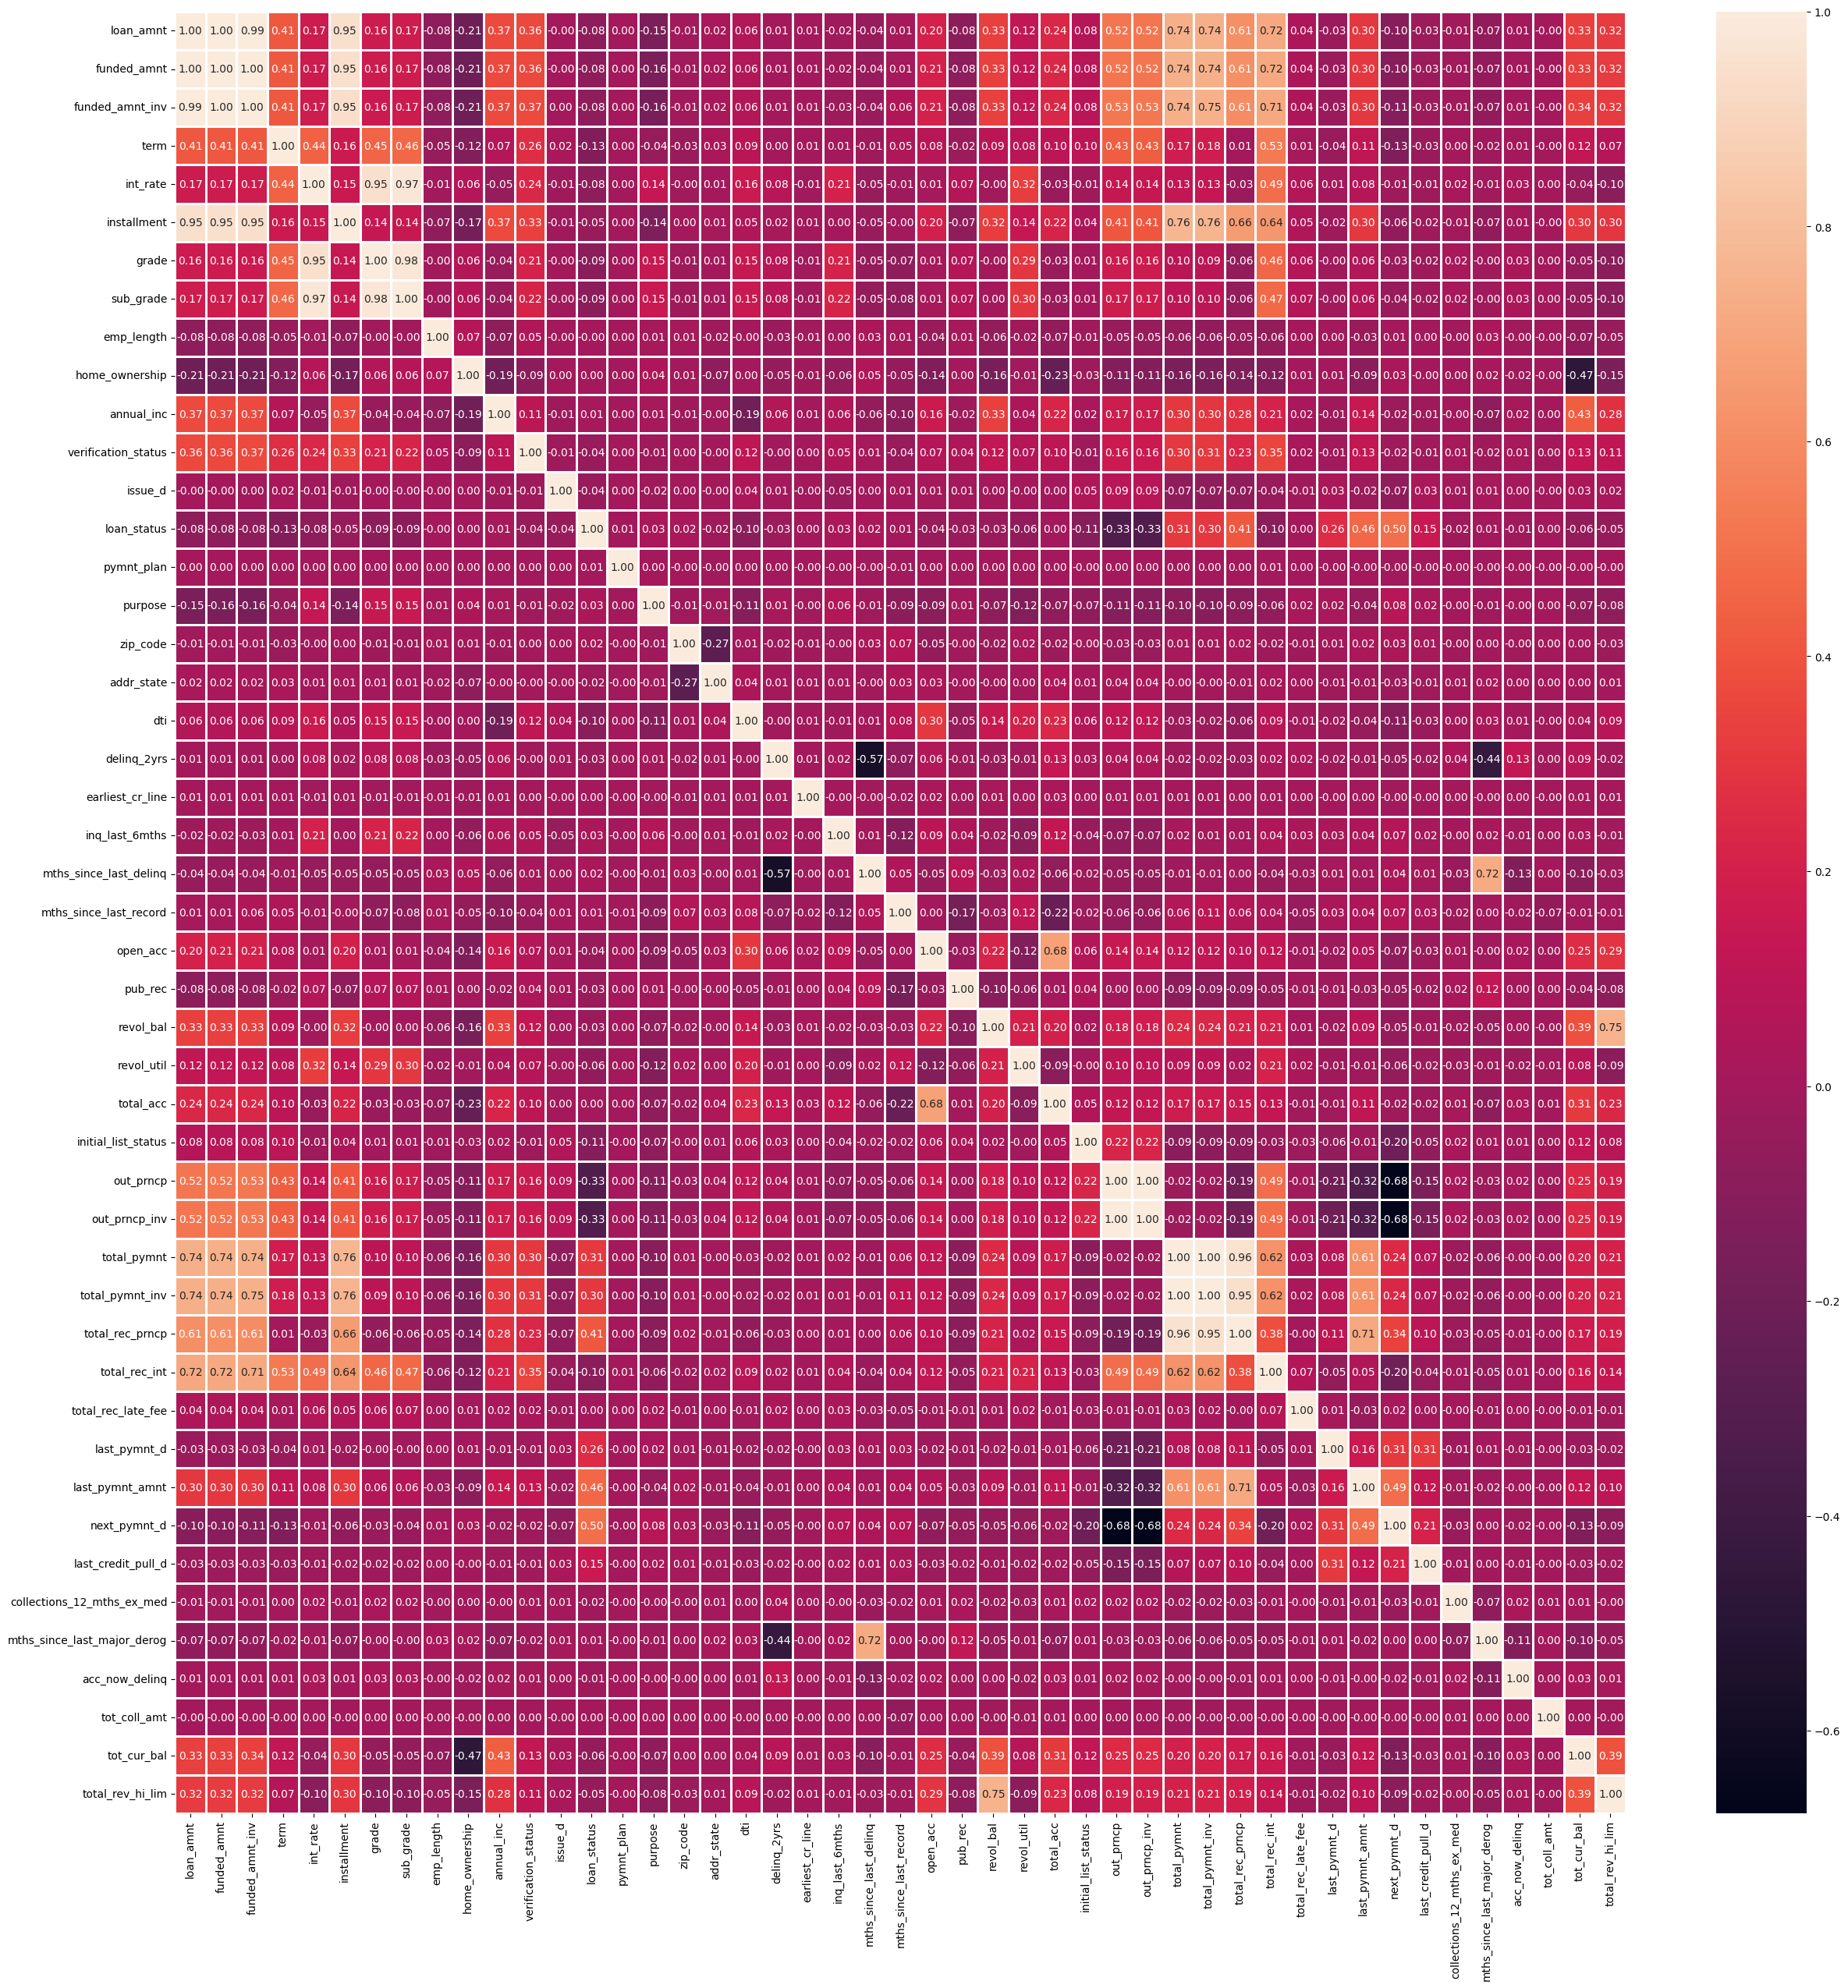

In [ ]:
# Heatmap of the correlation values
plt.figure(figsize = (30,30))
sns.heatmap(correlations, xticklabels=correlations.columns.values, yticklabels=correlations.columns.values, linewidths = 1,annot= True,fmt=".2f")

 **What do we learn from the heatmap?**

---
 - We can see a high correlation between "loan_amnt", "funded_amnt", and "funded_amnt_inv"; a smaller correlation to "installment"
  - After looking at the descriptions of these three, "funded_amnt" looks to be the most stable version.  "loan_amnt" is different in that the bank can change it after the fact depending on how someone's credit changes.  **Keep only "funded_amnt"**
  - "installment"'s relationship makes sense, given that the amount due is based on the total approved by the bank. **Keep for now**. However, this amount might be recreatable using interest and funded amount values.
 - "grade" and "subgrade" have high correlation (which makes sense since subgrade *is* grade, but with an extra number thrown on). **Keep only "subgrade"**
 - Grade/subgrade have high correlations to "int_rate" (makes sense again), maybe we shouldn't delete it, though? **Keep both "subgrade" and "int_rate"** in my opinion
 - "out_prncp" and "out_prncp_inv" are highly correlated.  These are basically the same term.  As a helpful note this is "what hasn't been paid yet".  **Keep "out_prncp"**
 - "total_pymnt", "total_pymnt_inv", and "total_rec_prncp" are highly correlated. "total_pymnt" and "total_paymnt_inv" are basically the same term. "total_rec_prncp" IS in fact, something different.  **Keep "total_pymnt" and "total_rec_prncp"**

In [ ]:
loan_cleanup.drop(['loan_amnt','funded_amnt_inv','grade','out_prncp_inv','total_pymnt_inv'], axis = 1,inplace = True)

loan_cleanup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   funded_amnt                  466285 non-null  int64  
 1   term                         466285 non-null  object 
 2   int_rate                     466285 non-null  float64
 3   installment                  466285 non-null  float64
 4   sub_grade                    466285 non-null  object 
 5   emp_length                   466285 non-null  object 
 6   home_ownership               466285 non-null  object 
 7   annual_inc                   466285 non-null  float64
 8   verification_status          466285 non-null  object 
 9   issue_d                      466285 non-null  object 
 10  loan_status                  466285 non-null  object 
 11  pymnt_plan                   466285 non-null  object 
 12  purpose                      466285 non-null  object 
 13 

<Axes: >

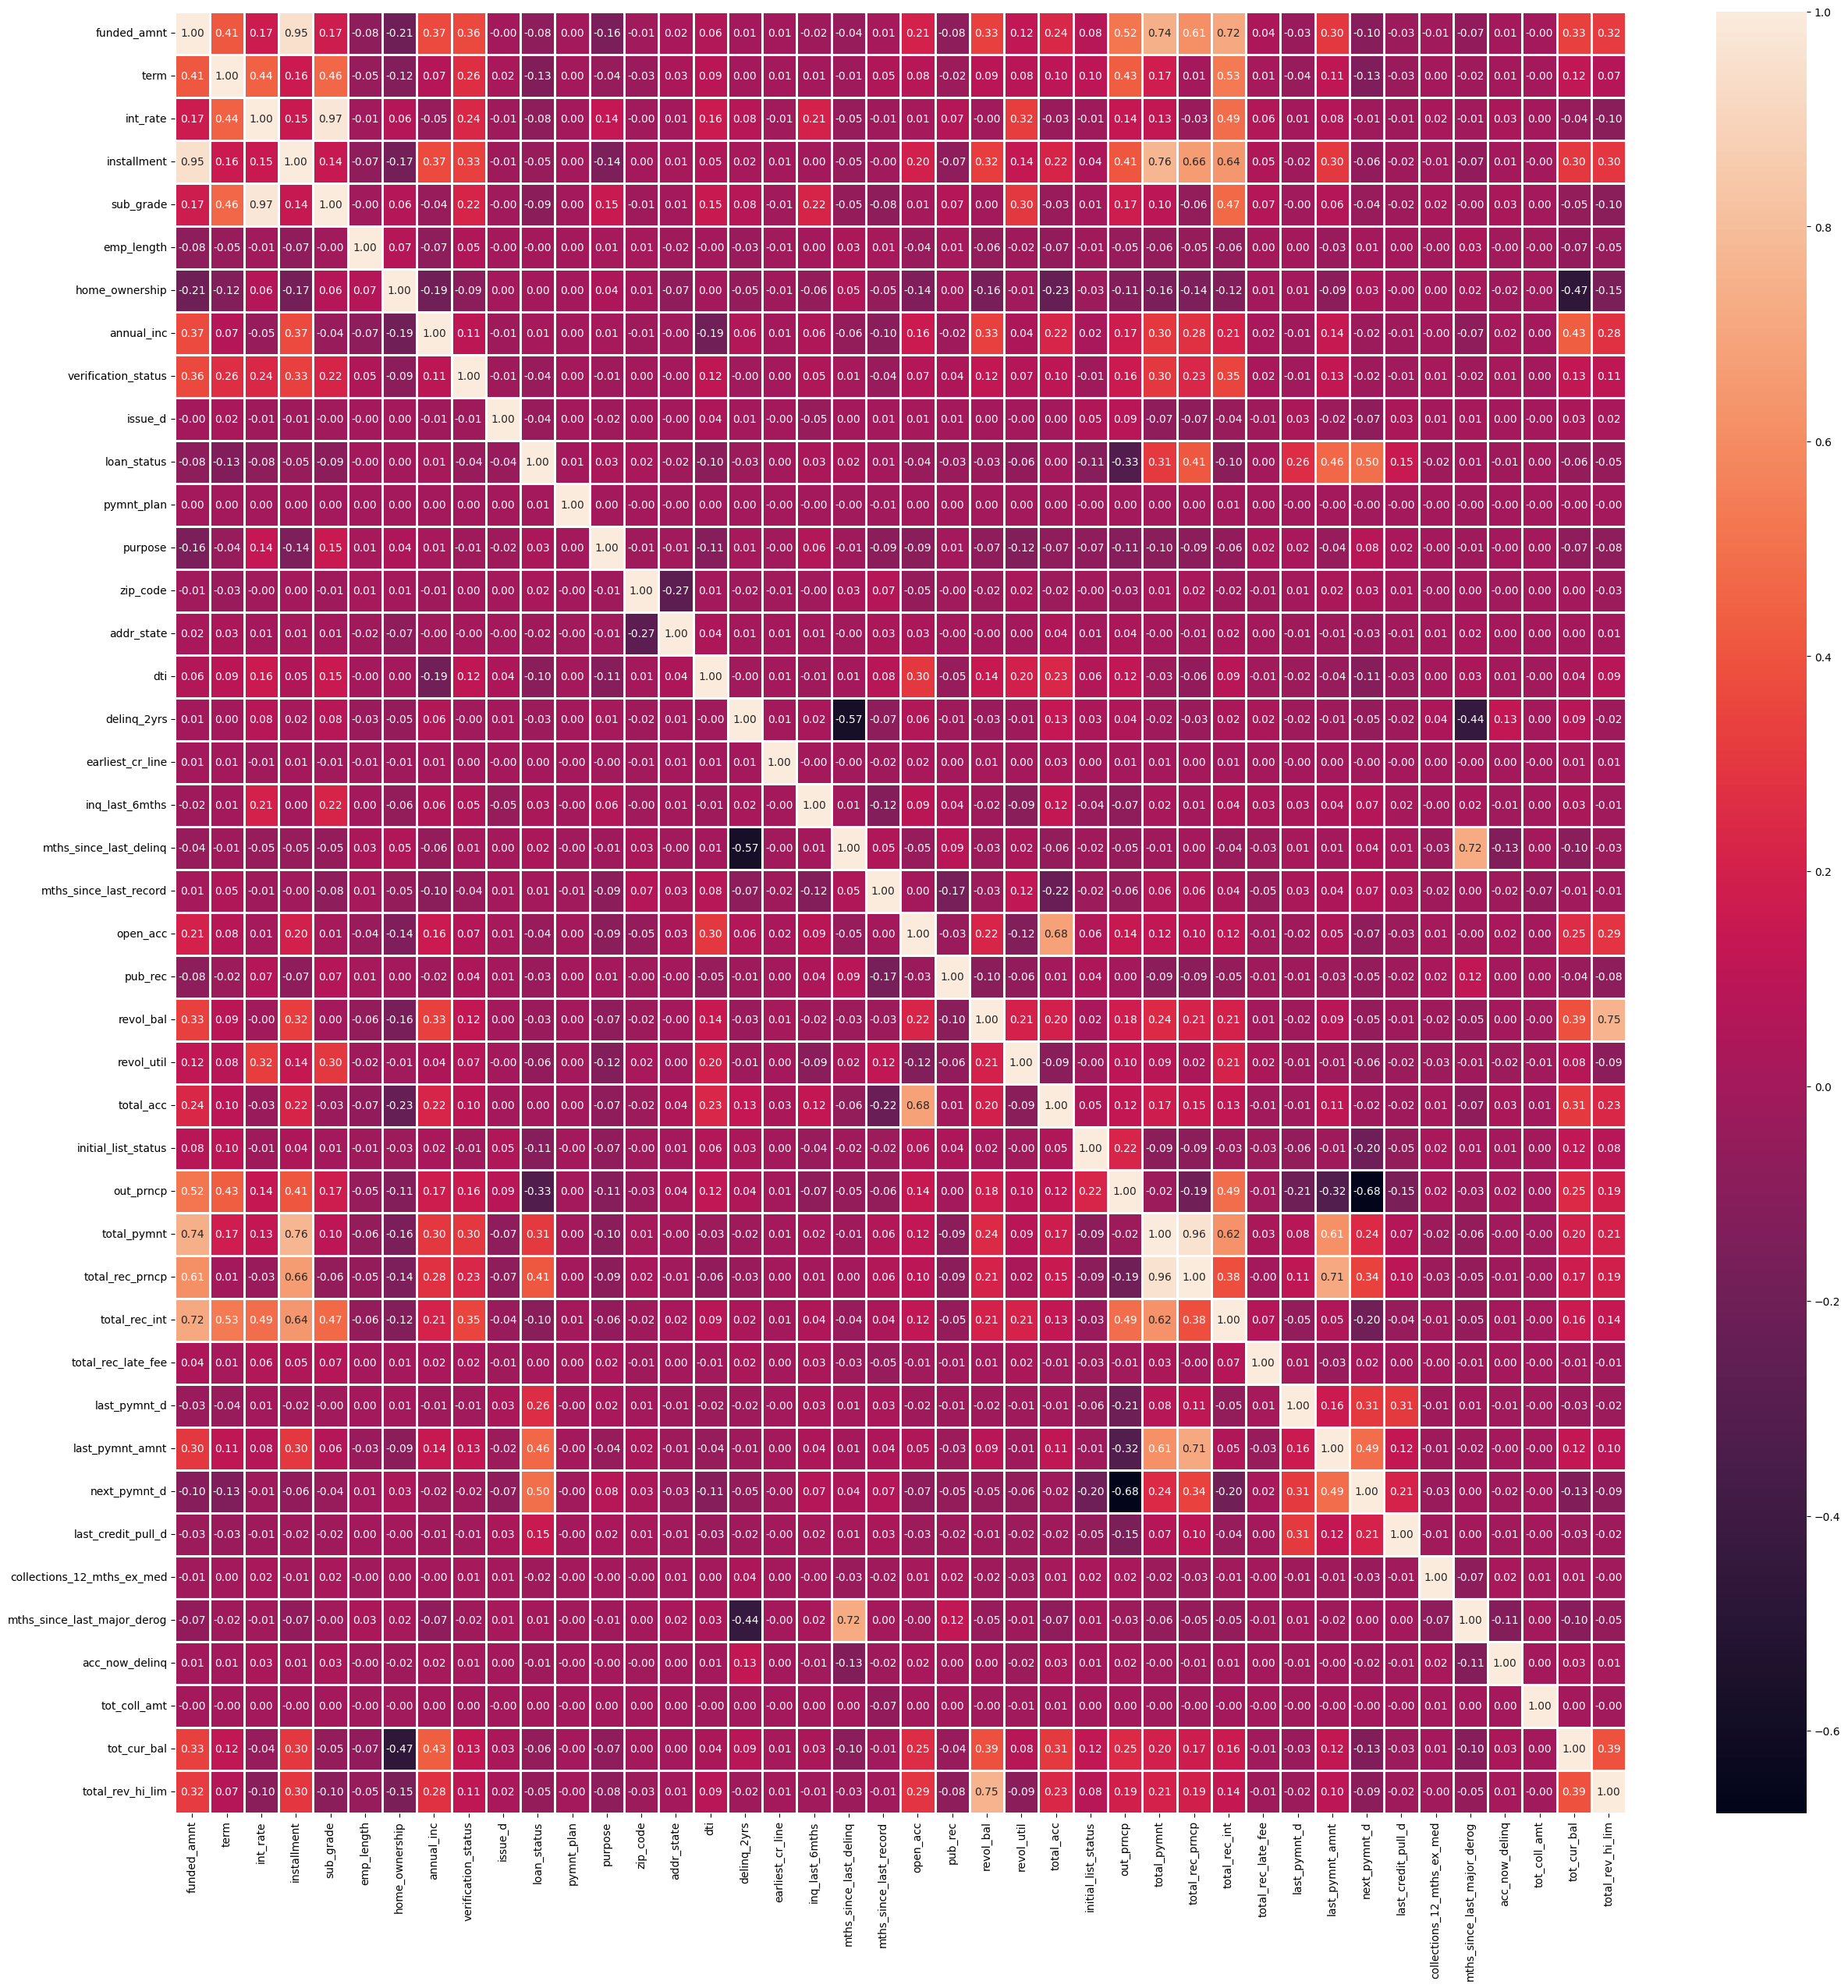

In [ ]:
## Updated correlation matrix requires entire rerun of the process
vis_data = loan_cleanup.copy()

for col in vis_data:
    if np.issubdtype(vis_data[col].dtype, np.number) == False:
      vis_data[col] = LabelEncoder().fit_transform(vis_data[col])

correlations = vis_data.corr(numeric_only = False)

plt.figure(figsize = (30,30))
sns.heatmap(correlations, xticklabels=correlations.columns.values, yticklabels=correlations.columns.values, linewidths = 1,annot= True,fmt=".2f")

## Continued exploration as of March 5th For Feature Engineering

 **Added Feature Columns**

Things that might be helpful for feature engineering are managed here.


 - A column is added for displaying how much money we lost by providing this loan
 - Columns with values that are intentionally left null are supplemented by boolean records of what they represent
 - **pymnt_plan** is dropped due to having only 9 values that are not 'n'.
 - **out_prncp** is droppd due to only having values while loans are current (or late).  It cannot be used to predict beforehand whether that loan will be successful.

\
Also important to note from this exploration: **"Current" loan status data should be ignored**.  These values could resolve any way in the end, and as such are not helpful for prediction.  This would leave us with 242k rows.

However, if we want to, that data **could be used as a sanity check** later on.  If we run our model on this data and the **proportions** for defaulting or not defaulting **are equivalent** to the other data we have, this would seem to indicate that our model is working well.

Also, our data **DOES** contain "default" loan statuses, although it is only 831 such rows.  This fact should be ignored, and our initial assumptions maintained.


In [ ]:
with pd.option_context('display.max_columns', None):  #Forces the display command to show all columns
  #display(loan_cleanup.query('pymnt_plan != "n"'))   # There are only 9 rows with a non-n value
  display(loan_cleanup.query('loan_status != "Current"')) ## This is roughly half the data: 242k rows.
  #display(loan_cleanup.query('loan_status == "Fully Paid" & total_rec_prncp != funded_amnt')) ## These two numbers should be equivalent.  The only cases they are not is where there is a rounding difference.
  #display(loan_cleanup.query('loan_status == "Charged Off"')['total_pymnt'] - loan_cleanup.query('loan_status == "Charged Off"')['funded_amnt']  )
  #display(loan_cleanup.query('total_rec_prncp - funded_amnt > 1') ) ## Takes care of small rounding errors
  #display(loan_cleanup.query('loan_status != "Current" & loss_conversion < 0')['loan_status'].value_counts())
  ## display(loan_cleanup.query('loan_status != "Current"')[['loan_status','out_prncp']].value_counts())

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,36 months,10.65,162.87,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,5861.071414,5000.00,861.07,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,0.0,0.0,5000.0
1,2500,60 months,15.27,59.83,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,1008.710000,456.46,435.17,0.00,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,0.0,0.0,2500.0
2,2400,36 months,15.96,84.33,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,3003.653644,2400.00,603.65,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,0.0,0.0,2400.0
3,10000,36 months,13.49,339.31,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,12226.302210,10000.00,2209.33,16.97,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,0.0,0.0,10000.0
5,5000,36 months,7.90,156.46,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,852xx,AZ,11.20,0.0,Nov-04,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,f,0.0,5631.377753,5000.00,631.38,0.00,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,0.0,0.0,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,8525,60 months,18.25,217.65,D3,5 years,MORTGAGE,37536.0,Verified,Jan-14,Charged Off,n,medical,011xx,MA,12.28,4.0,Nov-94,0.0,3.0,NaN,12.0,0.0,5318,10.7,26.0,f,0.0,2029.930000,360.08,510.45,0.00,May-14,217.65,NaN,Oct-14,0.0,4.0,0.0,0.0,116995.0,49800.0
466277,18000,36 months,7.90,563.23,A4,3 years,RENT,90000.0,Verified,Jan-14,Charged Off,n,debt_consolidation,212xx,MD,10.33,1.0,Jul-98,0.0,14.0,NaN,16.0,0.0,8224,16.3,33.0,f,0.0,5631.670000,4580.89,1050.78,0.00,Nov-14,563.23,NaN,Oct-14,0.0,14.0,0.0,0.0,42592.0,50300.0
466278,10000,36 months,18.25,362.78,D3,10+ years,RENT,42000.0,Source Verified,Jan-14,Fully Paid,n,vacation,201xx,VA,11.57,0.0,Jun-02,0.0,29.0,NaN,9.0,0.0,3196,28.8,24.0,f,0.0,12394.165200,10000.00,2394.17,0.00,Sep-15,5501.60,NaN,Jan-16,0.0,32.0,0.0,0.0,10170.0,11100.0
466281,22000,60 months,19.97,582.50,D5,10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,debt_consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.0,4677.920000,1837.04,2840.88,0.00,Dec-14,17.50,NaN,Jan-16,0.0,NaN,0.0,0.0,221830.0,39400.0


<Axes: >

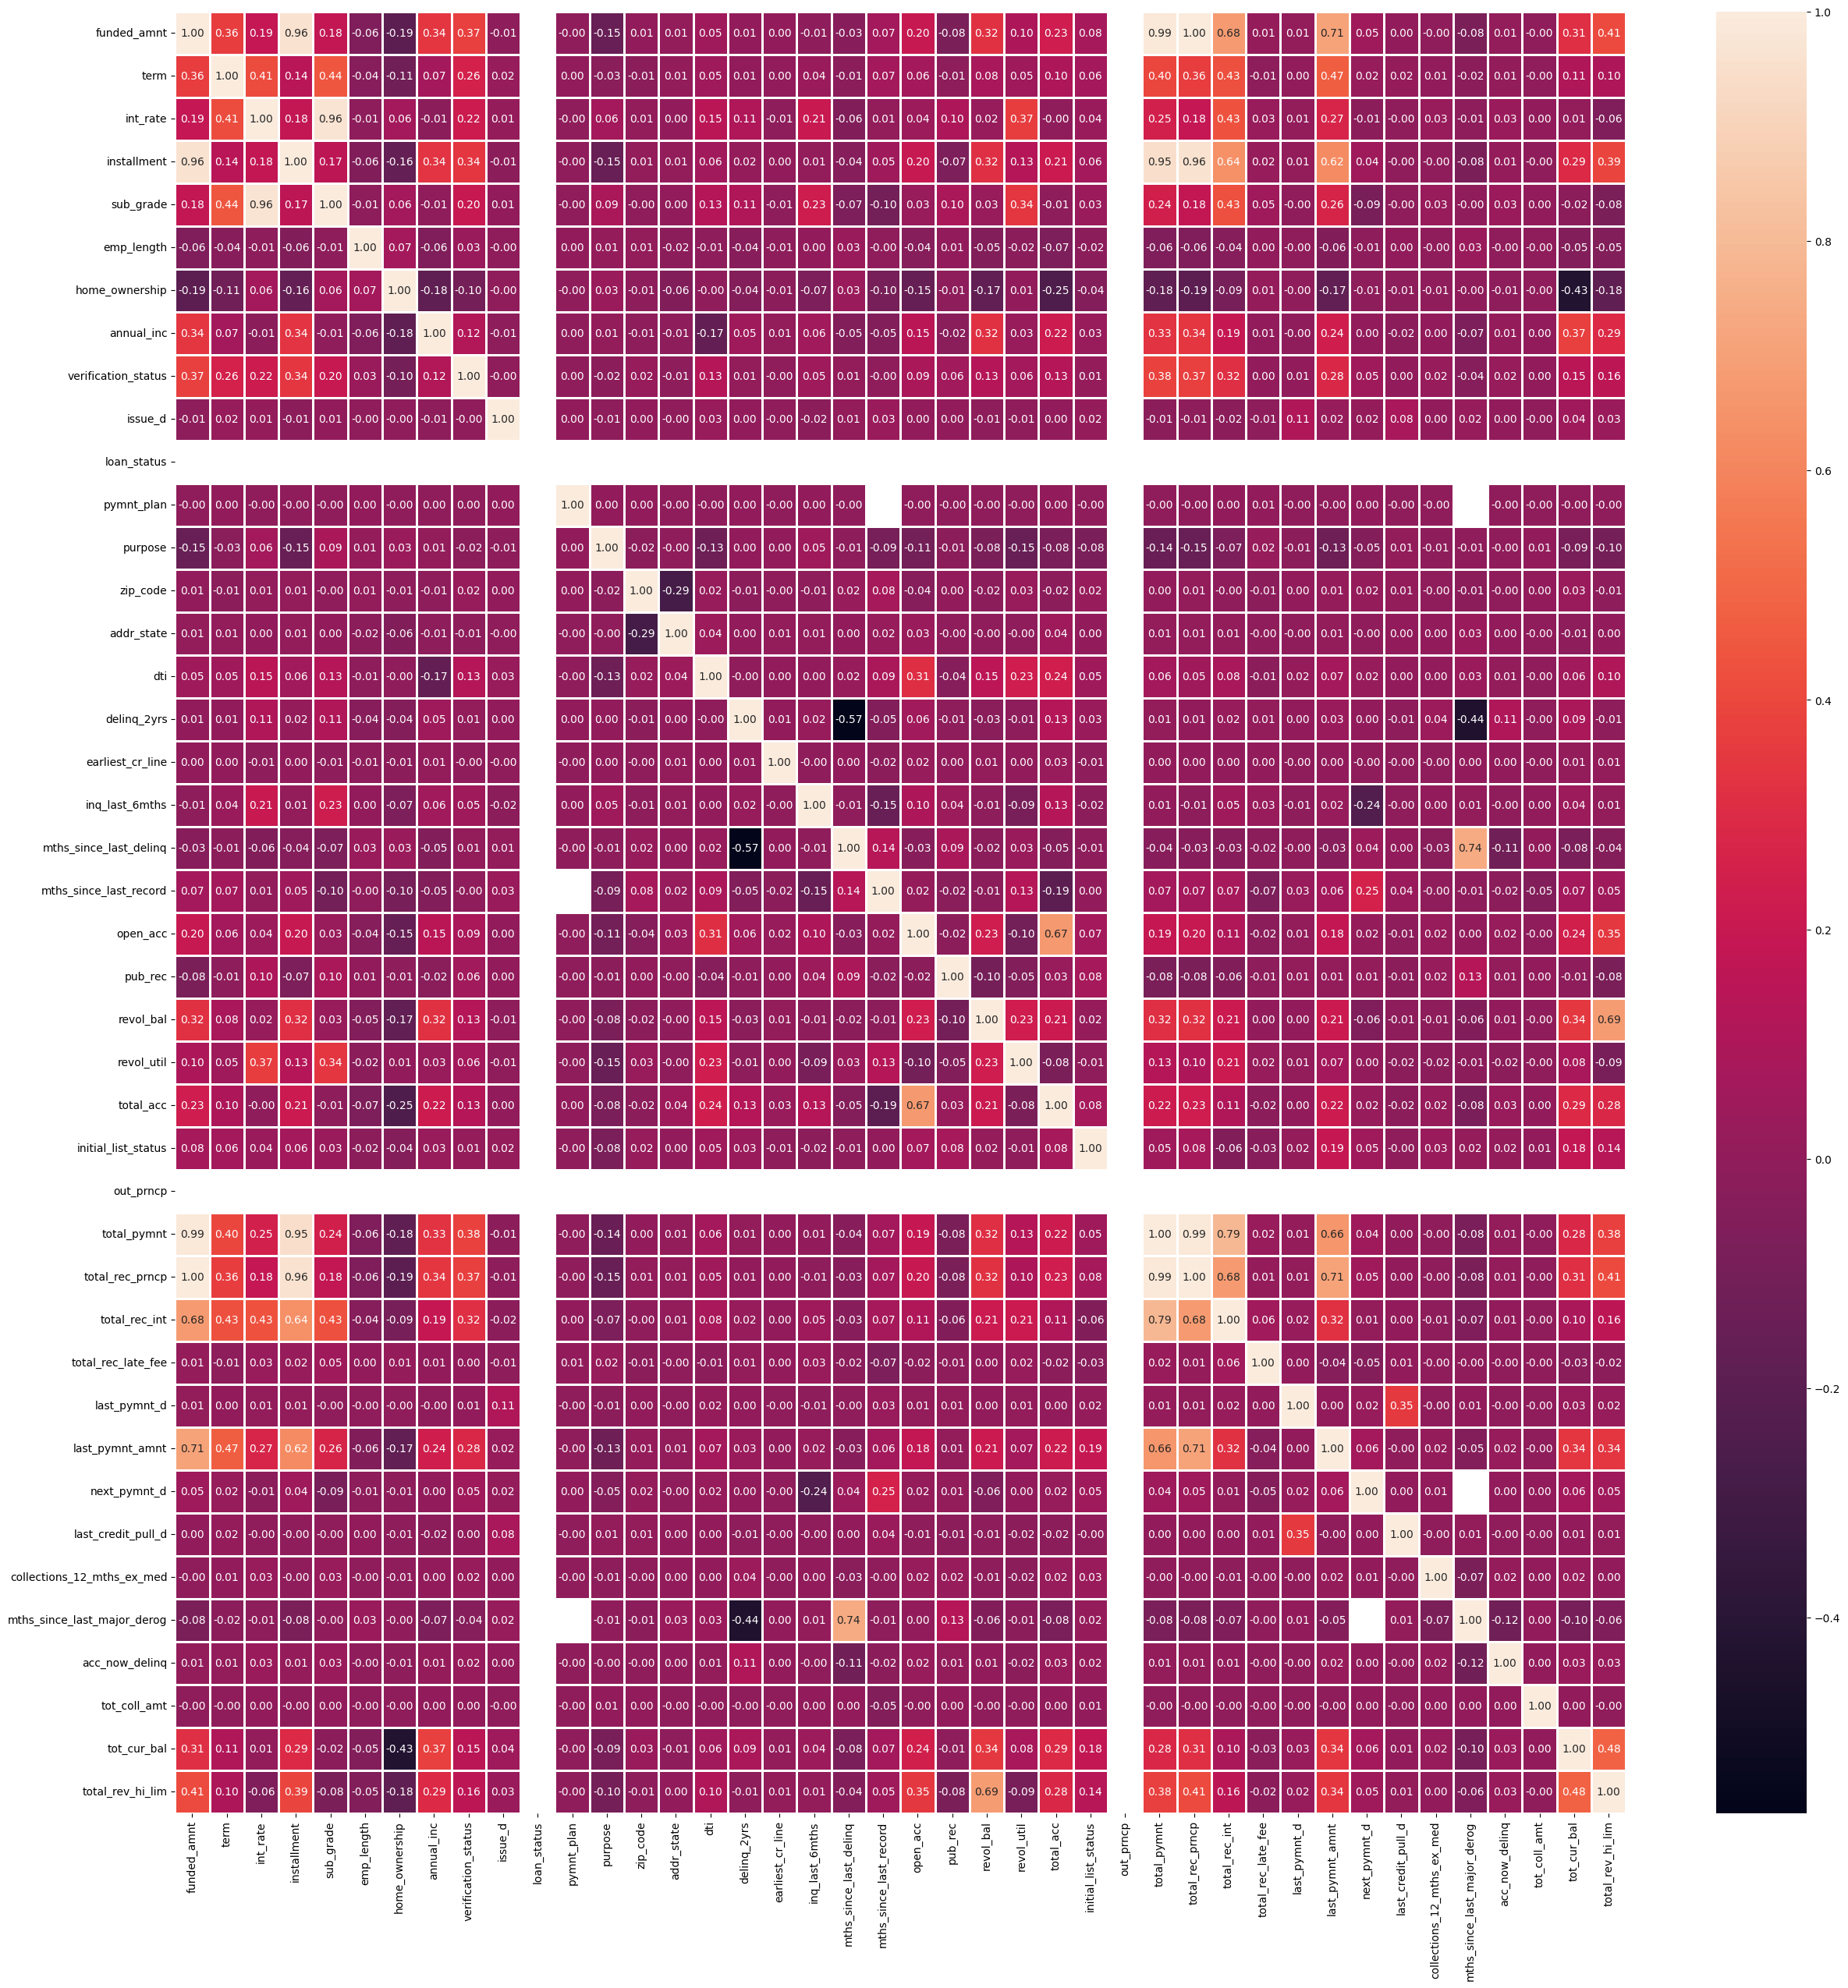

In [ ]:
from sklearn.preprocessing import LabelEncoder
## Updated correlation matrix requires entire rerun of the process
vis_data = loan_cleanup.query('loan_status == "Fully Paid"').copy()

for col in vis_data:
    if np.issubdtype(vis_data[col].dtype, np.number) == False:
      vis_data[col] = LabelEncoder().fit_transform(vis_data[col])

correlations = vis_data.corr(numeric_only = False)

plt.figure(figsize = (30,30))
sns.heatmap(correlations, xticklabels=correlations.columns.values, yticklabels=correlations.columns.values, linewidths = 1,annot= True,fmt=".2f")

## White values are 100% correlation, most likely through all values being identical.  I think it either breaks the heatmap (unlikely) or breaks the LabelEncoder (likely)

In [ ]:
loan_cleanup['total_pymnt'] = loan_cleanup['total_pymnt'].round(2) # Somehow these data are displaying values that are clearly errors caused by float evaluation
loan_cleanup.insert(2,
                    'loss_on_investment',
                    np.minimum(0,
                              ## The two methods of calculating losses should be identical, yet aren't.  Here we're assuming the largest possible loss is accurate.
                              loan_cleanup['total_pymnt'] - loan_cleanup['funded_amnt'],
                              loan_cleanup['total_rec_prncp'] + loan_cleanup['total_rec_int'] - loan_cleanup['funded_amnt']
                              )
                    )

loan_cleanup = loan_cleanup.drop(columns=['pymnt_plan','out_prncp'])

#loan_cleanup['mths_since_last_delinq']
loan_cleanup.insert(loan_cleanup.columns.get_loc('mths_since_last_delinq') + 1 , 'has_delinq', loan_cleanup['mths_since_last_delinq'].notnull())
#loan_cleanup['mths_since_last_record']
loan_cleanup.insert(loan_cleanup.columns.get_loc('mths_since_last_record') + 1 , 'has_record', loan_cleanup['mths_since_last_record'].notnull())
#loan_cleanup['last_pymnt_d']
loan_cleanup.insert(loan_cleanup.columns.get_loc('last_pymnt_d') + 1 , 'has_last_pymnt_d', loan_cleanup['last_pymnt_d'].notnull())
#loan_cleanup['next_pymnt_d']
loan_cleanup.insert(loan_cleanup.columns.get_loc('next_pymnt_d') + 1 , 'has_next_pymnt_d', loan_cleanup['next_pymnt_d'].notnull())
#loan_cleanup['mths_since_last_major_derog']
loan_cleanup.insert(loan_cleanup.columns.get_loc('mths_since_last_major_derog') + 1 , 'has_derog', loan_cleanup['mths_since_last_major_derog'].notnull())

In [ ]:
# Splitting the issue date column into its constituent parts month and year (previously represented as Dec - 11, now as [Dec] and [11])
loan_cleanup.insert(loan_cleanup.columns.get_loc('issue_d') + 1 , 'issue_y', loan_cleanup['issue_d'].map( lambda x: '20' + x[-2:]))
loan_cleanup.insert(loan_cleanup.columns.get_loc('issue_d') + 1 , 'issue_m', loan_cleanup['issue_d'].map( lambda x: x[:3] ))
loan_cleanup.drop(columns=['issue_d'], inplace = True)

# TL;DR Version: All Cleanup Steps Unified into One Location

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
# Specify the path to the file
file_path = '/content/drive/My Drive/loan_data_2007_2014.csv'

# Read the CSV file into a DataFrame
loan_data = pd.read_csv(file_path)

Mounted at /content/drive


<ipython-input-2-dddc4fd93c5f>:12: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv(file_path)


**Important to note here:**\
Several features, notably:
- **total_pymnt**
- **total_rec_prncp**
- **total_rec_int**
- Our added column **loss_on_investment**

are left in **PURELY** for the second-stage prediction.  We will be classifying our model based on **loan_status** using only things available *before* the loan has been initiated.  Afterwards, we want to look at these values to (for instance) maximize **total_pymnt**.  An alternative approach would be to predict straight to those and then choose whether to accept a loan based on that.

In [3]:
## Drop all nulls (17 columns)
loan_cleanup = loan_data.dropna(axis = 'columns', how = 'all')


## Drop unusable columns (10 columns)
loan_cleanup = loan_cleanup.drop(columns = ["Unnamed: 0", "id", "member_id", "url", "desc", "emp_title","recoveries" ,"collection_recovery_fee", "pymnt_plan", "out_prncp"])

## Drop columns with single values (combined objects and floats code) (3 columns)
loan_cleanup = loan_cleanup.drop(columns = ["title", "application_type", 'policy_code'])

## Drop columns with obvious causal correlation to other columns (keep 1 column for each correlation "relationship") (5 columns)
loan_cleanup.drop(['loan_amnt','funded_amnt_inv','grade','out_prncp_inv','total_pymnt_inv'], axis = 1,inplace = True)

## At this point we should have 40 columns ##

## Merge the "Does not meet the credit policy" values into their respective simpler names
loan_cleanup['loan_status'] = np.where((loan_cleanup['loan_status'] == "Does not meet the credit policy. Status:Fully Paid"), "Fully Paid", loan_cleanup['loan_status'])
loan_cleanup['loan_status'] = np.where((loan_cleanup['loan_status'] == "Does not meet the credit policy. Status:Charged Off"), "Charged Off", loan_cleanup['loan_status'])
## Well rip that we actually do have defaults in our loans, but our model will still be a proof of concept just as well.  Merge these two together (it's only 800 defaults)
loan_cleanup['loan_status'] = np.where((loan_cleanup['loan_status'] == "Default"), "Charged Off", loan_cleanup['loan_status'])

## Replace null values with reasonable approximations
loan_cleanup['emp_length'].fillna('< 1 year', inplace = True)
loan_cleanup['annual_inc'].fillna(0, inplace = True)
loan_cleanup['delinq_2yrs'].fillna(0, inplace =  True)
loan_cleanup['earliest_cr_line'].fillna(loan_cleanup['issue_d'], inplace =  True)
loan_cleanup['inq_last_6mths'].fillna(0, inplace =  True)
loan_cleanup['open_acc'].fillna(1, inplace =  True)
loan_cleanup['pub_rec'].fillna(0, inplace =  True)
loan_cleanup['total_acc'].fillna(1, inplace =  True)
loan_cleanup['acc_now_delinq'].fillna(0, inplace =  True)
#loan_cleanup['mths_since_last_delinq']
#loan_cleanup['mths_since_last_record']
loan_cleanup['revol_util'].fillna(58.0, inplace =  True)
#loan_cleanup['last_pymnt_d']
#loan_cleanup['next_pymnt_d']
loan_cleanup['last_credit_pull_d'].fillna('Jan-16', inplace = True)
loan_cleanup['collections_12_mths_ex_med'].fillna(0,inplace = True)
#loan_cleanup['mths_since_last_major_derog']
loan_cleanup['tot_coll_amt'].fillna(0, inplace = True)
loan_cleanup['tot_cur_bal'].fillna(0, inplace = True)
loan_cleanup['total_rev_hi_lim'].fillna(loan_cleanup['funded_amnt'], inplace = True)


## Added Cleanup Steps ##

## Fixes decimal imprecision in this column specifically for some reason
loan_cleanup['total_pymnt'] = loan_cleanup['total_pymnt'].round(2)

# Adds a column to show us how much money we lost by allowing this loan.
## THIS NUMBER IS [BOTTOM] CAPPED AT 0. ##
loan_cleanup.insert(loan_cleanup.columns.get_loc('funded_amnt') + 1,
                    'loss_on_investment',
                    np.minimum(0,
                              ## The two methods of calculating losses should be identical, yet aren't.  Here we're assuming the largest possible loss is accurate.
                              loan_cleanup['total_pymnt'] - loan_cleanup['funded_amnt'],
                              loan_cleanup['total_rec_prncp'] + loan_cleanup['total_rec_int'] - loan_cleanup['funded_amnt']
                              )
                    )
# Moves forward the target column so that it can be viewed more easily
loan_cleanup.insert(2, 'loan_status', loan_cleanup.pop('loan_status'))

# For columns with nulls intentionally left in, keeps a boolean record of them in case it's useful for models
loan_cleanup.insert(loan_cleanup.columns.get_loc('mths_since_last_delinq') + 1 , 'has_delinq', loan_cleanup['mths_since_last_delinq'].notnull())
loan_cleanup.insert(loan_cleanup.columns.get_loc('mths_since_last_record') + 1 , 'has_record', loan_cleanup['mths_since_last_record'].notnull())
loan_cleanup.insert(loan_cleanup.columns.get_loc('last_pymnt_d') + 1 , 'has_last_pymnt_d', loan_cleanup['last_pymnt_d'].notnull())
loan_cleanup.insert(loan_cleanup.columns.get_loc('next_pymnt_d') + 1 , 'has_next_pymnt_d', loan_cleanup['next_pymnt_d'].notnull())
loan_cleanup.insert(loan_cleanup.columns.get_loc('mths_since_last_major_derog') + 1 , 'has_derog', loan_cleanup['mths_since_last_major_derog'].notnull())

# Splitting the issue date column into its constituent parts month and year (previously represented as Dec - 11, now as [Dec] and [11])
loan_cleanup.insert(loan_cleanup.columns.get_loc('issue_d') + 1 , 'issue_y', loan_cleanup['issue_d'].map( lambda x: '20' + x[-2:]))
loan_cleanup.insert(loan_cleanup.columns.get_loc('issue_d') + 1 , 'issue_m', loan_cleanup['issue_d'].map( lambda x: x[:3] ))
loan_cleanup.drop(columns=['issue_d'], inplace = True)

## Should now be at 47 columns ##

loan_cleanup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   funded_amnt                  466285 non-null  int64  
 1   loss_on_investment           466285 non-null  float64
 2   loan_status                  466285 non-null  object 
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   sub_grade                    466285 non-null  object 
 7   emp_length                   466285 non-null  object 
 8   home_ownership               466285 non-null  object 
 9   annual_inc                   466285 non-null  float64
 10  verification_status          466285 non-null  object 
 11  issue_m                      466285 non-null  object 
 12  issue_y                      466285 non-null  object 
 13 

In [ ]:
## Display a single row of random data

with pd.option_context('display.max_columns', None):
  display(loan_cleanup.sample(1).T)

In [ ]:
## The approximate formula for installment

df = loan_cleanup[['funded_amnt','sub_grade','term','installment','int_rate']]

df['generated_installment'] = (df['funded_amnt'] / df['term']) * (1.0 + df['int_rate']/(36*60/df['term']))
df['similarity_ratio'] = df['generated_installment']/df['installment']

## Displays the cases where it's not true
display(df.sort_values('similarity_ratio',ascending=False).query('similarity_ratio > 1.05'))
display(df.sort_values('similarity_ratio',ascending=False).query('similarity_ratio < .95'))

,funded_amnt,sub_grade,term,installment,int_rate,installment2,installment ratio
8,5600,F2,60,152.39,21.28,147.777778,1.031211
6,7000,C5,60,170.08,15.96,165.277778,1.029055
4,3000,B5,60,67.79,12.69,66.666667,1.016850
9,5375,B5,60,121.45,12.69,119.444444,1.016791
1,2500,C4,60,59.83,15.27,59.027778,1.013591
2,2400,C5,36,84.33,15.96,83.333333,1.011960
7,3000,E1,36,109.43,18.64,108.333333,1.010123
5,5000,A4,36,156.46,7.90,155.092593,1.008817
0,5000,B2,36,162.87,10.65,162.037037,1.005141
3,10000,C1,36,339.31,13.49,337.962963,1.003986


In [8]:
## Percentage of Defaults by State

temp = loan_cleanup.query('loan_status == "Fully Paid" | loan_status == "Charged Off"')

states = loan_cleanup['addr_state'].unique()
paid =[];
default = [];


for x in states:
  paid.append(loan_cleanup.query(f'loan_status == "Fully Paid" & addr_state == "{x}"')['loan_status'].count())
  default.append(loan_cleanup.query(f'loan_status == "Charged Off" & addr_state == "{x}"')['loan_status'].count())

dat = pd.DataFrame(zip(states,paid,default), columns = ['states','fully paid','defaulted'])
dat['ratio'] = dat['defaulted']/dat['fully paid']

dat['percentage of defaults'] = dat['defaulted']/(dat['defaulted'] + dat['fully paid'])

display(dat.sort_values('percentage of defaults',ascending = False))

,states,fully paid,defaulted,ratio,percentage of defaults
46,NE,6,7,1.166667,0.538462
43,MS,210,80,0.380952,0.275862
44,TN,1551,542,0.349452,0.258958
48,IN,1811,587,0.324130,0.244787
45,IA,10,3,0.300000,0.230769
27,NV,2651,777,0.293097,0.226663
24,AL,2229,628,0.281741,0.219811
11,FL,12603,3463,0.274776,0.215548
37,NM,983,262,0.266531,0.210442
8,MO,2909,766,0.263321,0.208435
